In [1]:
import operator
from typing_extensions import TypedDict, Literal
from langgraph.graph import START, END, StateGraph
from langgraph.types import Command


class State(TypedDict):
    product_description: str
    leads: list
    emails: list

In [2]:
def lead_generator(state: State) -> Command[Literal["lead_generator", "outreach_email_writer"]]:
    product_description = state["product_description"]
    previous_leads = state.get("leads", [])
    
    print("Generating leads using product description/tools/previous leads")
    
    # Dummy AI logic to generate leads using product description and previous leads - this should be replaced with actual logic
    new_leads = [{"lead_name": "name1"}, {"lead_name": "name2"}]

    # Combine new and previous leads generated
    leads = previous_leads + new_leads
    
    if len(leads) < 5:
        return Command(update={"leads": leads}, goto="lead_generator")
    else:
        return Command(update={"leads": leads}, goto="outreach_email_writer")


def outreach_email_writer(state: dict):
    product_description = state["product_description"]
    leads = state["leads"]
    print("Generating outreach emails using leads and product description")

    # Dummy AI logic to generate emails using leads and description - this should be replaced with actual logic
    emails = []
    for lead in leads:
        email_content = f"Email for {lead['lead_name']}, about {product_description} generated"
        emails.append({**lead, "email": email_content})
    
    return {"emails": emails}

In [3]:
graph_builder = StateGraph(State)

graph_builder.add_node(lead_generator)
graph_builder.add_node(outreach_email_writer)

graph_builder.add_edge(START, "lead_generator")
graph_builder.add_edge("outreach_email_writer", END)


graph = graph_builder.compile()

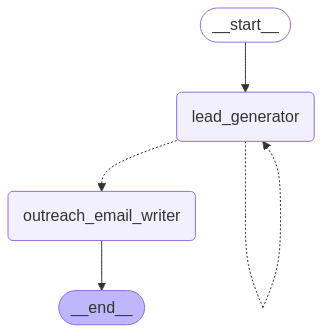

In [4]:
graph

In [5]:
result = graph.invoke({"product_description": "my awesome product"})
result

Generating leads using product description/tools/previous leads
Generating leads using product description/tools/previous leads
Generating leads using product description/tools/previous leads
Generating outreach emails using leads and product description


{'product_description': 'my awesome product',
 'leads': [{'lead_name': 'name1'},
  {'lead_name': 'name2'},
  {'lead_name': 'name1'},
  {'lead_name': 'name2'},
  {'lead_name': 'name1'},
  {'lead_name': 'name2'}],
 'emails': [{'lead_name': 'name1',
   'email': 'Email for name1, about my awesome product generated'},
  {'lead_name': 'name2',
   'email': 'Email for name2, about my awesome product generated'},
  {'lead_name': 'name1',
   'email': 'Email for name1, about my awesome product generated'},
  {'lead_name': 'name2',
   'email': 'Email for name2, about my awesome product generated'},
  {'lead_name': 'name1',
   'email': 'Email for name1, about my awesome product generated'},
  {'lead_name': 'name2',
   'email': 'Email for name2, about my awesome product generated'}]}